In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 14s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
#plt.imshow(x_train[1])

In [ ]:
x_train[0].max()

255

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
#y_test See continous variables but need to convert to classes

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train, 10)

In [ ]:
y_cat_test = to_categorical(y_test, 10)

In [ ]:
y_train[0] # number matches with number of cifar image number on search

array([6], dtype=uint8)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

# add more convulationanl layers since more information
model.add(Conv2D(filters = 32, kernel_size =(4,4), input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size =(4,4), input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation= 'relu'))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [ ]:
model.fit(x_train, y_cat_train, epochs = 15, 
          validation_data=(x_test, y_cat_test), callbacks = [early_stop])

Epoch 1/15
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5188 - accuracy: 0.4491 - val_loss: 1.3558 - val_accuracy: 0.5139
Epoch 2/15
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1838 - accuracy: 0.5787 - val_loss: 1.1427 - val_accuracy: 0.5850
Epoch 3/15
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0509 - accuracy: 0.6312 - val_loss: 1.0221 - val_accuracy: 0.6392
Epoch 4/15
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9387 - accuracy: 0.6715 - val_loss: 0.9962 - val_accuracy: 0.6555
Epoch 5/15
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8566 - accuracy: 0.7022 - val_loss: 1.0005 - val_accuracy: 0.6520
Epoch 6/15
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7845 - accuracy: 0.7263 - val_loss: 0.9761 - val_accuracy: 0.6677
Epoch 7/15
1563/1563 [==============================] - 74s 48ms/step - loss: 0.7177 - accuracy: 0.7476 - val_loss: 1.0590 -

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.518843,0.44906,1.355792,0.5139
1,1.183841,0.57874,1.142680,0.5850
2,1.050921,0.63116,1.022143,0.6392
3,0.938675,0.67152,0.996233,0.6555
4,0.856587,0.70224,1.000471,0.6520
5,0.784462,0.72628,0.976103,0.6677
6,0.717659,0.74764,1.058962,0.6595
7,0.653795,0.77040,0.983696,0.6742


In [ ]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

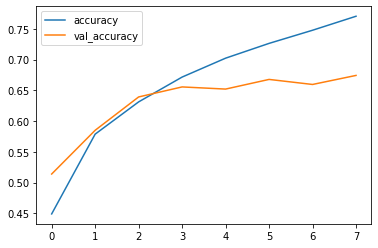

In [ ]:
metrics[[ 'accuracy', 'val_accuracy']].plot()

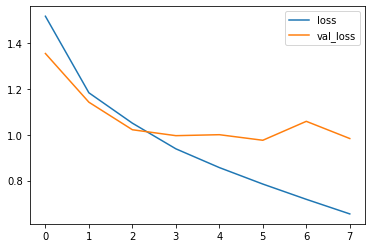

In [ ]:
metrics[['loss', 'val_loss']].plot()

In [ ]:
model.evaluate(x_test, y_cat_test, verbose =1)

313/313 [==============================] - 4s 13ms/step - loss: 0.9837 - accuracy: 0.6742


[0.9836961627006531, 0.6741999983787537]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1000
           1       0.80      0.77      0.79      1000
           2       0.67      0.49      0.57      1000
           3       0.42      0.63      0.51      1000
           4       0.64      0.63      0.63      1000
           5       0.62      0.46      0.53      1000
           6       0.77      0.75      0.76      1000
           7       0.73      0.73      0.73      1000
           8       0.81      0.76      0.78      1000
           9       0.67      0.82      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.68     10000
weighted avg       0.69      0.67      0.68     10000



In [ ]:
confusion_matrix(y_test, predictions)

array([[703,  22,  55,  35,  18,   8,   7,  15,  72,  65],
       [ 23, 767,   5,  17,   4,   3,  14,   6,  29, 132],
       [ 58,   7, 491, 136, 102,  61,  64,  38,  17,  26],
       [ 21,  11,  31, 629,  61, 115,  47,  37,  13,  35],
       [ 16,   7,  49, 114, 630,  21,  42,  97,  11,  13],
       [  9,   4,  35, 309,  65, 463,  28,  57,  10,  20],
       [  8,   6,  34,  99,  47,  18, 753,  13,   4,  18],
       [ 15,   4,  15,  84,  55,  42,  13, 732,   4,  36],
       [ 70,  53,  10,  28,   6,   8,   6,   2, 755,  62],
       [ 26,  73,  11,  32,   3,   3,   4,  11,  18, 819]])

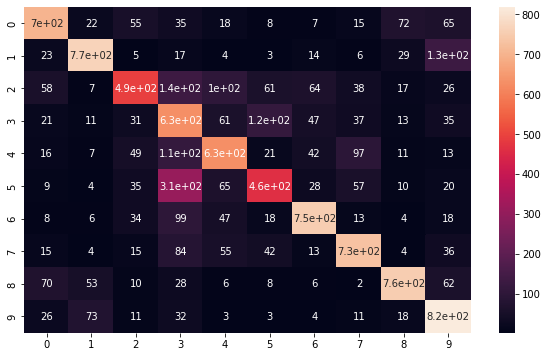

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)

In [ ]:
my_image = x_test[0]

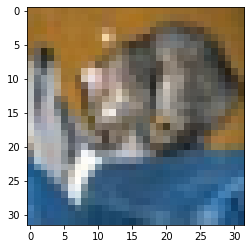

In [ ]:
plt.imshow(my_image)

In [ ]:
y_test[0]

array([3], dtype=uint8)

In [ ]:
np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis=-1)

array([3])